In [61]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

#### 该函数用于产生评分数据

In [62]:
'''
参数:
num_player:参赛选手数目
num_judge:评委的数目
seed_num:随机数种子
返回值：
'''
def createTalbe(num_player=10,num_judge=10,seed_num = 20):
    columns = []
    for tmp in range(1,num_judge+1):
        columns.append('评委'+str(tmp))
    index = list(range(1,num_player+1))
    # 设置随机数种子确保结果可再现
    np.random.seed(seed_num)             
    scores = np.random.randint(60,101,size=(num_player,num_judge))         # Return random integers from low (inclusive) to high (exclusive).
    # 生成大小为(选手数，评委数)的多维评分dataframe
    source_df = pd.DataFrame(data=scores, index=index, columns=columns)
    return source_df

In [63]:
num_player = 100
num_judge = 10
source_df = createTalbe(100,10)
source_df.head(20)    # 查看前20名位选手成绩

,评委1,评委2,评委3,评委4,评委5,评委6,评委7,评委8,评委9,评委10
1,95,86,75,91,88,86,69,80,71,82
2,67,94,92,100,81,86,86,79,76,98
3,98,76,97,67,97,94,66,86,73,71
4,85,63,70,71,73,79,90,92,70,66
5,71,78,63,73,77,76,78,75,86,67
6,71,89,66,74,84,78,89,93,74,90
7,63,78,66,82,74,64,87,71,68,66
8,86,75,78,74,70,93,81,77,100,78
9,80,90,96,68,79,91,70,98,69,83
10,92,72,74,91,77,69,87,98,99,83


#### 程序功能要求
* 1.计算平均成绩并保存，平均成绩要求去除最大最小值，同时保留四位小数
* 2.确定选手排名并保存，找出前100名保存，输出冠亚军
* 3.一等奖1名，2等奖2名，3等奖3名，输出获奖选手名单
* 4.最后平均得分(95,100]为一等奖，（90,95]为二等奖，（85,90]为三等奖，(80,85]为鼓励奖,输出获奖名单
* 5.分析每位评委是否认真打分
* 6.找出争议比较大的20名选手名单
* 7.找出特质最相似的20名选手名单

In [64]:
class AnalyseData:
    def __init__(self,num_player,num_judge,source_df):
        self.num_player = num_player
        self.num_judge = num_judge
        self.s_df = source_df.copy()  # 新建一个df
        
    # 求平均值（去除最大最小值）
    # 返回带有平均分的表格
    def calc_average(self):
        tmp = self.s_df.copy()
        sum_score = tmp.sum(axis = 1)
        max_score = tmp.max(axis = 1)
        min_score = tmp.min(axis = 1)
        average = list((sum_score-max_score-min_score)/(self.num_judge-2)) # 去除最高分与最低分求平均值
        average = ['{:.4f}'.format(i) for i in average]                    # 保证四位小数
        tmp['平均分']= average                                       # 将求出的均值加入到表格中
        return tmp
    
    # 输入：已经计算出的带有“平均分”的表格，注意必须先调用calc_average得到这样的表格
    # 输出：带有排名信息的表格（排名按照平均分从高到低排序）
    def order_table(self,df_average):
        tmp = df_average.copy()
        tmp.sort_values(by='平均分',axis=0,ascending=False,inplace=True)
        rank = list(range(1,self.num_player+1))
        tmp["排名"] = rank            # 添加排名信息到表格中
        return tmp
    
    # 获取排名前100的选手名单以及冠亚季军选手编号
    # 输入：带有“排名”信息的表格
    # 输出：排名前100人的名单的表格,一个列表列表存储[冠军编号，亚军编号，季军编号]
    # 要确保选手人数大于100人
    def findTop100(self,df_ordered): 
        tmp = df_ordered.copy()
        df_top = tmp.iloc[:100]
        res_list = list(df_top.iloc[:3].index)  # 获取前3名选手的编号（行标签）
        return res_list,df_top
    
    # 获取前6名选手，用于颁布一等奖1名，2等奖2名，3等奖3名
    def findTop6(self,df_ordered): 
        res_list = list(df_top.iloc[:6].index)  # 获取前6名选手编号
        return res_list
    
    def giveAward(self,df_ordered):
        df_one = df_ordered[df_ordered.平均分 > '95']
        df_two = df_ordered[(df_ordered.平均分 <= '95')&(df_ordered.平均分 > '90')]
        df_three = df_ordered[(df_ordered.平均分 <= '90')&(df_ordered.平均分 > '85')]
        df_four = df_ordered[(df_ordered.平均分 <= '85')&(df_ordered.平均分 > '80')]
        columns_num = len(df_one.columns)      # 获取列数，方便后面插入'获奖情况‘
#         if(len(df_one) > 0)
        # 构造各个奖项获奖名单
        df_one.insert(columns_num, '获奖情况', '一等奖')
        df_two.insert(columns_num, '获奖情况', '二等奖')
        df_three.insert(columns_num, '获奖情况', '三等奖')
        df_four.insert(columns_num, '获奖情况', '鼓励奖')
        num = [len(df_one),len(df_two),len(df_three),len(df_four)]  # 存储各个奖项的获奖人数
        frame = [df_one,df_two,df_three,df_four]         
        df_final = pd.concat(frame)                                # 将名单拼接成一个大的名单
        return num,df_final
    def analyseJudge(self,bins=20):
        self.s_df.hist(bins=bins,figsize=(40,30))

In [65]:
analyseObject = AnalyseData(num_player,num_judge,source_df)
df_avg = analyseObject.calc_average()
df_avg.head()

,评委1,评委2,评委3,评委4,评委5,评委6,评委7,评委8,评委9,评委10,平均分
1,95,86,75,91,88,86,69,80,71,82,82.3750
2,67,94,92,100,81,86,86,79,76,98,86.5000
3,98,76,97,67,97,94,66,86,73,71,82.6250
4,85,63,70,71,73,79,90,92,70,66,75.5000
5,71,78,63,73,77,76,78,75,86,67,74.3750


In [66]:
df_ordered = analyseObject.order_table(df_avg)
df_ordered

,评委1,评委2,评委3,评委4,评委5,评委6,评委7,评委8,评委9,评委10,平均分,排名
81,91,80,85,98,100,87,98,95,92,92,92.2500,1
31,100,96,88,91,85,77,99,86,60,93,89.3750,2
96,98,92,90,100,96,81,69,64,93,96,89.3750,3
63,99,91,84,89,94,76,80,98,98,67,88.7500,4
33,95,99,78,76,81,98,63,81,98,92,87.3750,5
32,91,99,71,83,97,89,100,66,66,99,86.8750,6
65,75,64,72,95,96,98,89,97,84,85,86.6250,7
2,67,94,92,100,81,86,86,79,76,98,86.5000,8
30,81,85,79,97,78,94,79,95,96,60,85.8750,9
66,96,98,86,62,98,61,98,94,80,69,85.3750,10


In [67]:
res_list,df_top = analyseObject.findTop100(df_ordered)
print(res_list)    # 冠军，亚军，季军编号

[81, 31, 96]


In [68]:
num,df_award =  analyseObject.giveAward(df_ordered)
print(num)

[0, 1, 10, 40]


In [69]:
df_award

,评委1,评委2,评委3,评委4,评委5,评委6,评委7,评委8,评委9,评委10,平均分,排名,获奖情况
81,91,80,85,98,100,87,98,95,92,92,92.2500,1,二等奖
31,100,96,88,91,85,77,99,86,60,93,89.3750,2,三等奖
96,98,92,90,100,96,81,69,64,93,96,89.3750,3,三等奖
63,99,91,84,89,94,76,80,98,98,67,88.7500,4,三等奖
33,95,99,78,76,81,98,63,81,98,92,87.3750,5,三等奖
32,91,99,71,83,97,89,100,66,66,99,86.8750,6,三等奖
65,75,64,72,95,96,98,89,97,84,85,86.6250,7,三等奖
2,67,94,92,100,81,86,86,79,76,98,86.5000,8,三等奖
30,81,85,79,97,78,94,79,95,96,60,85.8750,9,三等奖
66,96,98,86,62,98,61,98,94,80,69,85.3750,10,三等奖


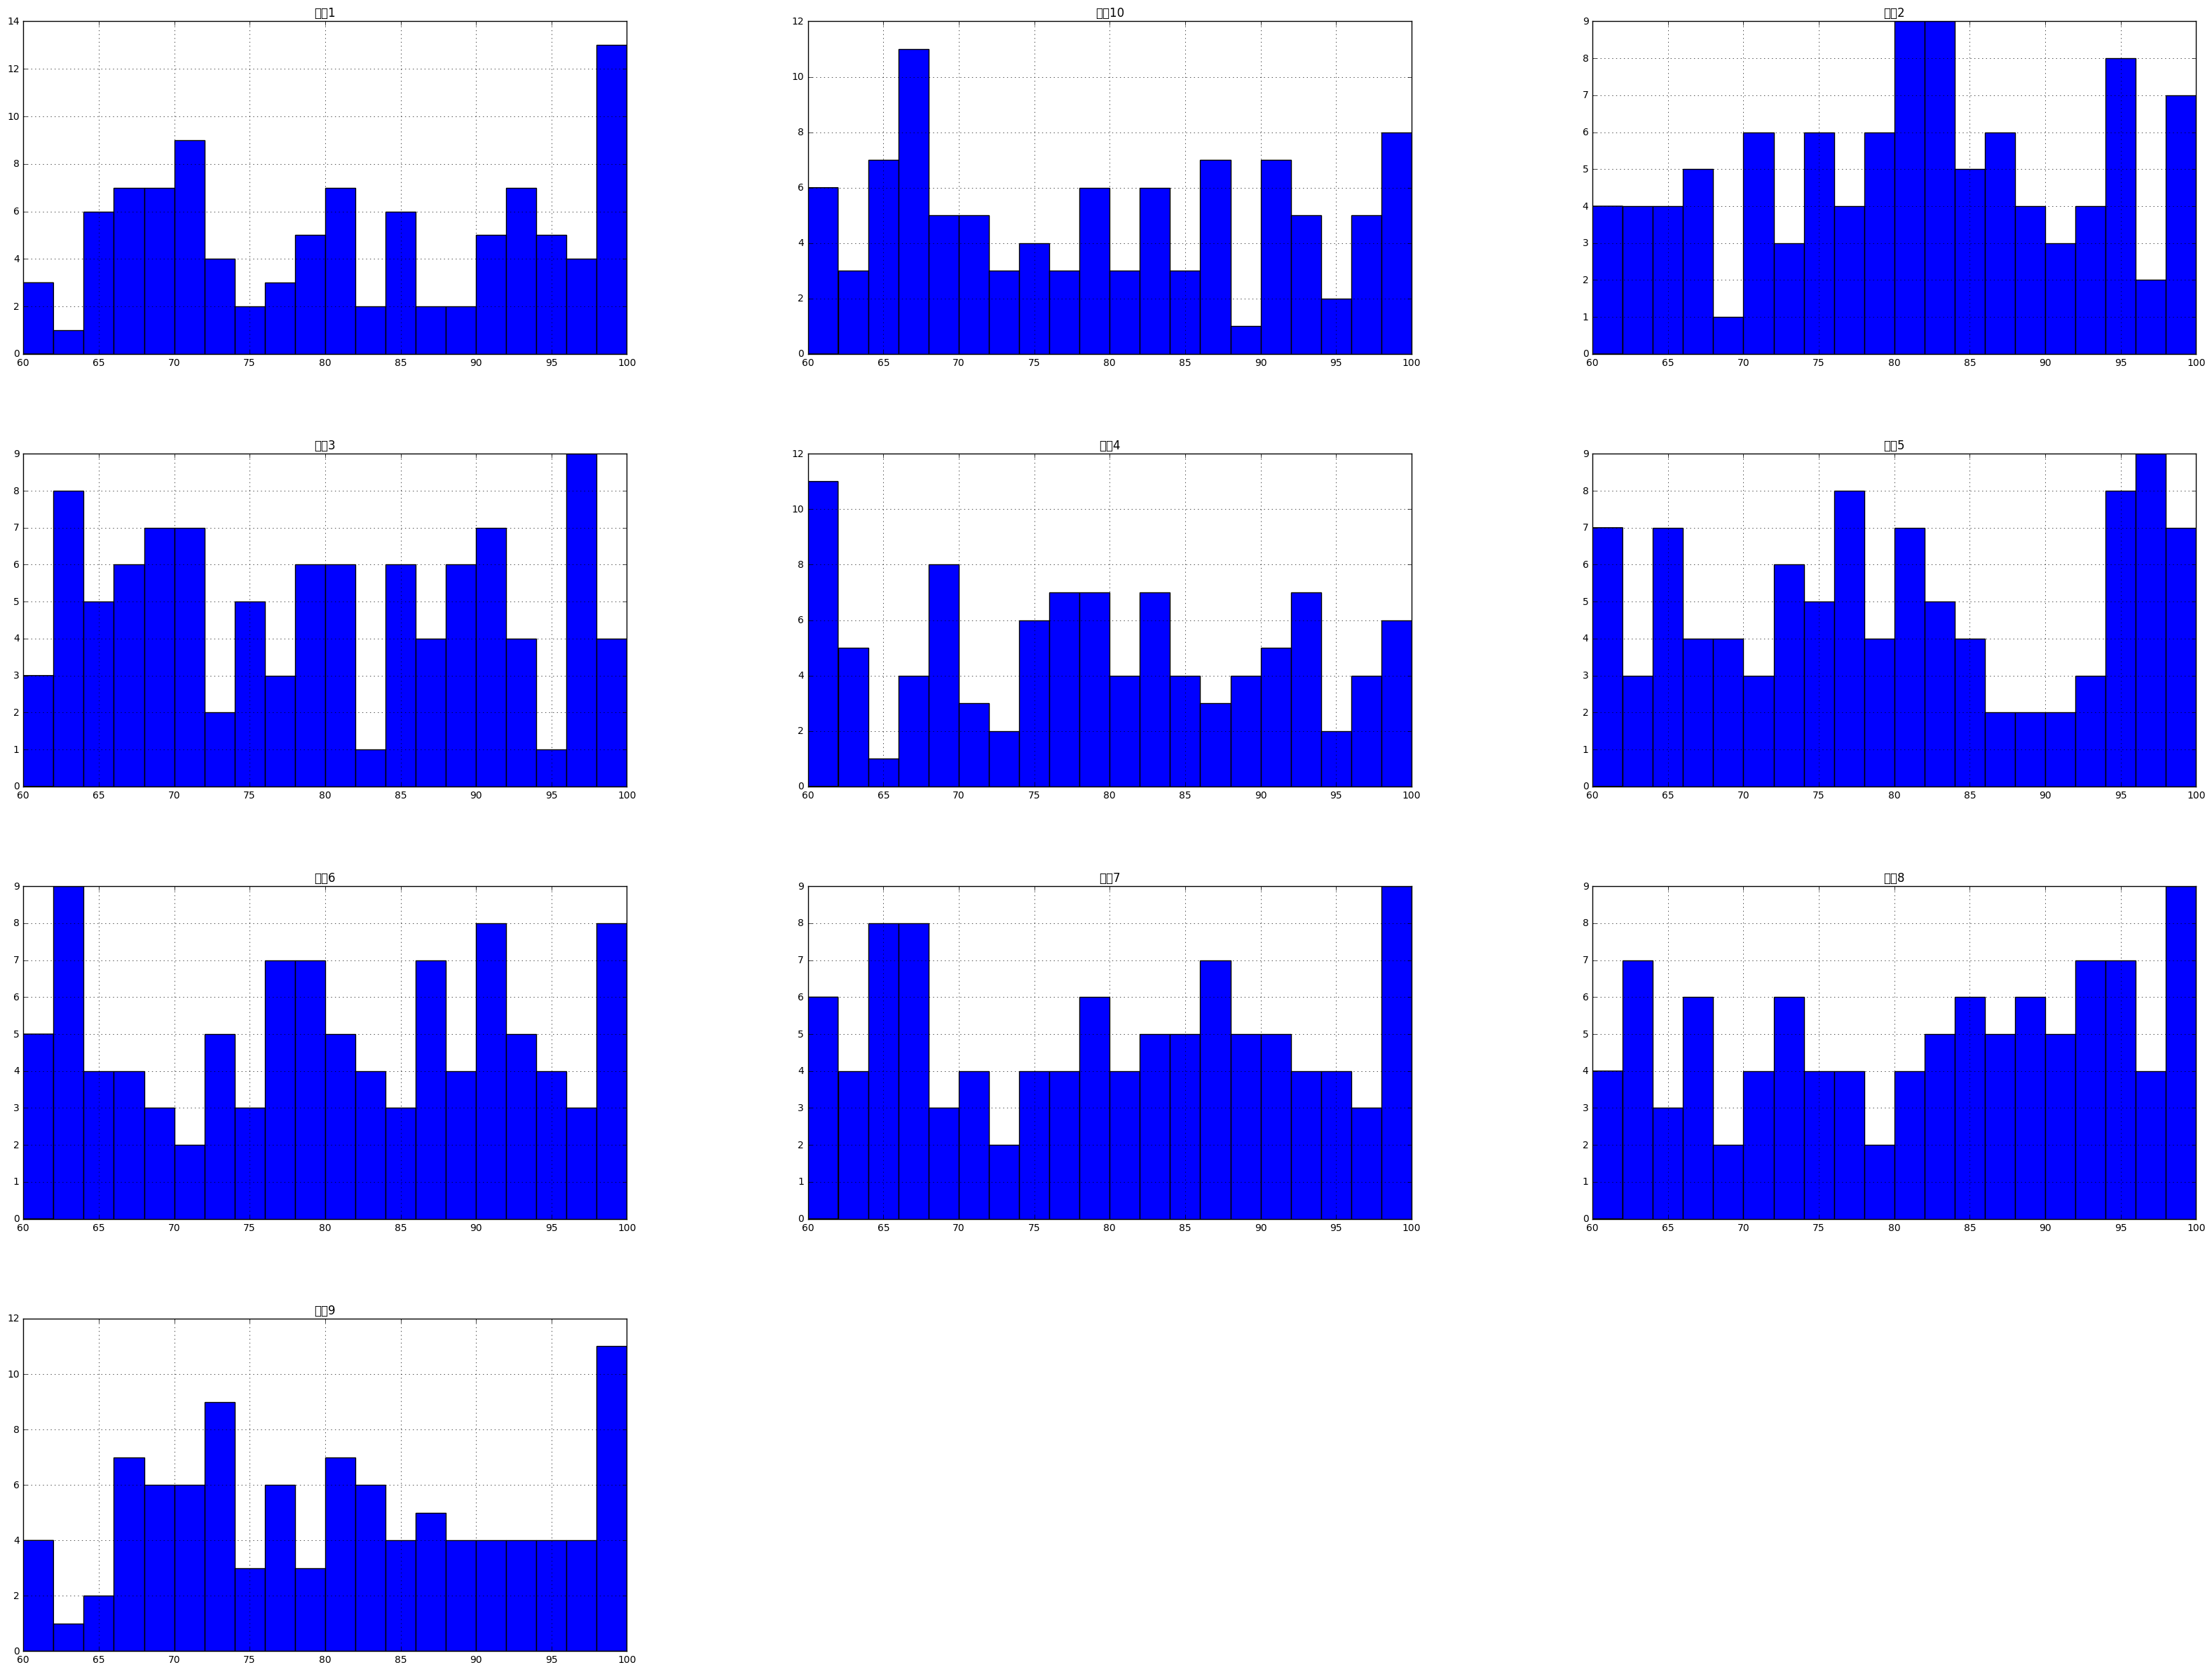

In [70]:
analyseObject.analyseJudge(bins=20)